# 8.Продвинутый SQL

# Сервис вопросов и ответов о программировании

Работа ведётся с базой данных StackOverflow — сервиса вопросов и ответов о программировании. StackOverflow похож на социальную сеть — пользователи сервиса задают вопросы, отвечают на посты, оставляют комментарии и ставят оценки другим ответам.

Предоставлена версия базы, в которой хранятся данные о постах за 2008 год, но в таблицах есть информацию и о более поздних оценках, которые эти посты получили. 

**Задачи исследования** - произвести различные выгрузки данных сервиса вопросов и ответов с помощью SQL.

**Источник данных** - база данных, которая хранит информацию о вопросах и ответах по программированию от разных пользователей.

**Навыки и инструменты** - SQL, обработка данных, выгрузка данных.

## Схема базы данных

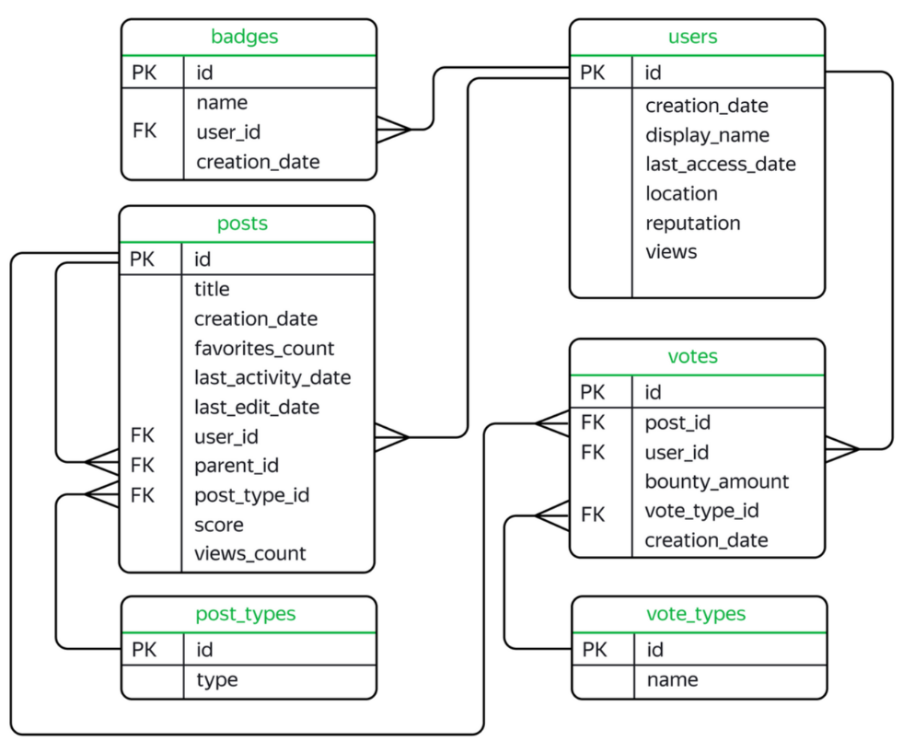

## Описание таблиц, содержащихся в базе данных

Таблица `stackoverflow.badges`. Хранит информацию о значках, которые присуждаются за разные достижения. Например, пользователь, правильно ответивший на большое количество вопросов про PostgreSQL, может получить значок postgresql.
- `id` - Идентификатор значка, первичный ключ таблицы
- `name` - Название значка
- `user_id` - Идентификатор пользователя, которому присвоили значок, внешний ключ, отсылающий к таблице `users`
- `creation_date` - Дата присвоения значка

Таблица stackoverflow.badges. Содержит информацию о типе постов. Их может быть два:
- `Question` — пост с вопросом;
- `Answer` — пост с ответом.

- `id` - Идентификатор поста, первичный ключ таблицы
- `type` - Тип поста

Таблица stackoverflow.posts. Содержит информацию о постах:
- `id` - Идентификатор поста, первичный ключ таблицы
- `title` - Заголовок поста
- `creation_date` - Дата создания поста
- `favorites_count` - Число, которое показывает, сколько раз пост добавили в «Закладки»
- `last_activity_date` - Дата последнего действия в посте, например комментария
- `last_edit_date` - Дата последнего изменения поста
- `user_id` - Идентификатор пользователя, который создал пост, внешний ключ к таблице users
- `parent_id` - Если пост написали в ответ на другую публикацию, в это поле попадёт идентификатор поста с вопросом
- `post_type_id` - Идентификатор типа поста, внешний ключ к таблице post_types
- `score` - Количество очков, которое набрал пост
- `views_count` - Количество просмотров

Таблица stackoverflow.users. Содержит информацию о пользователях:
- `id` - Идентификатор пользователя, первичный ключ таблицы
- `creation_date` - Дата регистрации пользователя
- `display_name` - Имя пользователя
- `last_access_date` - Дата последнего входа
- `location` - Местоположение
- `reputation` - Очки репутации, которые получают за хорошие вопросы и полезные ответы
- `views` - Число просмотров профиля пользователя

Таблица stackoverflow.vote_types. Содержит информацию о типах голосов. Голос — это метка, которую пользователи ставят посту. Типов бывает несколько: 
- `UpMod` — такую отметку получают посты с вопросами или ответами, которые пользователи посчитали уместными и полезными.
- `DownMod` — такую отметку получают посты, которые показались пользователям наименее полезными.
- `Close` — такую метку ставят опытные пользователи сервиса, если заданный вопрос нужно доработать или он вообще не подходит для платформы.
- `Offensive` — такую метку могут поставить, если пользователь ответил на вопрос в грубой и оскорбительной манере, например, указав на неопытность автора поста.
- `Spam` — такую метку ставят в случае, если пост пользователя выглядит откровенной рекламой.

- `id` — Идентификатор типа голоса, первичный ключ
- `name` — Название метки

Таблица stackoverflow.votes. Содержит информацию о голосах за посты:
- `id` — Идентификатор голоса, первичный ключ
- `post_id` — Идентификатор поста, внешний ключ к таблице posts
- `user_id` — Идентификатор пользователя, который поставил посту голос, внешний ключ к таблице users
- `bounty_amount` — Сумма вознаграждения, которое назначают, чтобы привлечь внимание к посту
- `vote_type_id` — Идентификатор типа голоса, внешний ключ к таблице vote_types
- `creation_date` — Дата назначения голоса

## Загрузка данных

### Используемые библиотеки и функции

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine
# устанавливаем параметры
db_config = {'user': 'user', # имя пользователя
             'pwd': 'pwd', # пароль
             'host': 'host',
             'port': port, # порт подключения
             'db': 'db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [2]:
# функция выполнения SQL-запроса
def read_sql(query):
    return pd.io.sql.read_sql(query, con = engine)

## Задания

###  Часть 1

####  Задание 1

Найти количество вопросов, которые набрали больше 300 очков или как минимум 100 раз были добавлены в «Закладки».

In [3]:
query = '''
           SELECT COUNT(p.id) AS count_questions
           FROM stackoverflow.posts p
           JOIN stackoverflow.post_types pt ON p.post_type_id=pt.id
           WHERE pt.type = 'Question'
             AND (p.score > 300 OR p.favorites_count >= 100);
        '''
read_sql(query)

,count_questions
0,1355


1355 вопросов набрали больше 300 очков или, как минимум, 100 раз были добавлены в "Закладки".

####  Задание 2

Сколько в среднем в день задавали вопросов с 1 по 18 ноября 2008 включительно? Результат округлить до целого числа.

In [4]:
query = '''
           WITH ques_day AS (SELECT COUNT(p.id) AS ques_day,
                                    p.creation_date::date
                             FROM stackoverflow.posts p
                             JOIN stackoverflow.post_types pt ON p.post_type_id=pt.id
                             WHERE pt.type = 'Question'
                               AND p.creation_date::date BETWEEN '2008-11-01' AND '2008-11-18'
                             GROUP BY p.creation_date::date)
                             
           SELECT ROUND(AVG(ques_day)) AS avg_questions
           FROM ques_day;
        '''
read_sql(query)

,avg_questions
0,383.0


С 1 по 18 ноября 2008 включительно в среднем в день задавали 383 вопросов.

####  Задание 3

Сколько пользователей получили значки сразу в день регистрации? Вывести количество уникальных пользователей.

In [5]:
query = '''
           WITH user_bag AS (SELECT u.id,
                                    u.creation_date::date AS user_date,
                                    b.creation_date::date AS badges_date
                             FROM stackoverflow.users u
                             JOIN stackoverflow.badges b ON u.id=b.user_id)
            
           SELECT COUNT(DISTINCT id) AS count_user
           FROM user_bag
           WHERE user_date=badges_date;
        '''
read_sql(query)

,count_user
0,7047


Сразу в день регистрации получили значки 7047 пользователей.

####  Задание 4

Сколько уникальных постов пользователя с именем Joel Coehoorn получили хотя бы один голос?

In [6]:
query = '''
           WITH post_JC AS (SELECT id AS post_id,
                                   user_id 
                            FROM stackoverflow.posts
                            WHERE user_id = (SELECT id
                                             FROM stackoverflow.users
                                             WHERE display_name = 'Joel Coehoorn'))
                                              
           SELECT COUNT(DISTINCT(pjc.post_id)) AS count_posts
           FROM post_JC pjc
           JOIN stackoverflow.votes v ON pjc.post_id=v.post_id;
        '''
read_sql(query)

,count_posts
0,12


12 уникальных постов пользователя Joel Coehoorn получили хотя бы один голос.

####  Задание 5

Выгрузить все поля таблицы vote_types. Добавить к таблице поле rank, в которое войдут номера записей в обратном порядке. Таблица должна быть отсортирована по полю id.

In [7]:
query = '''
           SELECT *,
                  ROW_NUMBER() OVER (ORDER BY id DESC) AS rank
           FROM stackoverflow.vote_types
           ORDER BY id
        '''
read_sql(query)           

,id,name,rank
0,1,AcceptedByOriginator,15
1,2,UpMod,14
2,3,DownMod,13
3,4,Offensive,12
4,5,Favorite,11
5,6,Close,10
6,7,Reopen,9
7,8,BountyStart,8
8,9,BountyClose,7
9,10,Deletion,6


####  Задание 6

Отобрать 10 пользователей, которые поставили больше всего голосов типа Close. Отобразить таблицу из двух полей: идентификатором пользователя и количеством голосов. Отсортировать данные сначала по убыванию количества голосов, потом по убыванию значения идентификатора пользователя.

In [8]:
query = '''
           WITH vote_close AS (SELECT user_id,
                                      id AS vote_id
                               FROM stackoverflow.votes
                               WHERE vote_type_id = (SELECT id AS id_votes
                                                     FROM stackoverflow.vote_types
                                                     WHERE name = 'Close'))
                                                      
           SELECT DISTINCT(u.id),
                  COUNT(v.vote_id) AS count_vote
           FROM vote_close v
           JOIN stackoverflow.users u ON v.user_id = u.id
           GROUP BY u.id
           ORDER BY count_vote DESC,
                    u.id DESC
           LIMIT 10;
        '''
read_sql(query)  

,id,count_vote
0,20646,36
1,14728,36
2,27163,29
3,41158,24
4,24820,23
5,9345,23
6,3241,23
7,44330,20
8,38426,19
9,19074,19


Было отобрано 10 пользователей, которые поставили больше всего голосов типа `Close`. Видно, что больше всего поставил голосов пользователь с id равным 20646, а меньше всего с id равным 19074.

####  Задание 7

Отобрать 10 пользователей по количеству значков, полученных в период с 15 ноября по 15 декабря 2008 года включительно.
Отобразить несколько полей:
- идентификатор пользователя;
- число значков;
- место в рейтинге — чем больше значков, тем выше рейтинг.

Пользователям, которые набрали одинаковое количество значков, присвоить одно и то же место в рейтинге.
Отсортировать записи по количеству значков по убыванию, а затем по возрастанию значения идентификатора пользователя.

In [9]:
query = '''
           WITH bag_top AS (SELECT id AS bag_id,
                                   user_id
                            FROM stackoverflow.badges
                            WHERE creation_date::date BETWEEN '2008-11-15' AND '2008-12-15'),
                user_top AS (SELECT u.id AS user_id,
                                    COUNT(bag_id) AS count_bag       
                             FROM stackoverflow.users u
                             JOIN bag_top b ON u.id=b.user_id
                             GROUP BY u.id
                             ORDER BY count_bag DESC)
                             
           SELECT *,
                  DENSE_RANK() OVER (ORDER BY count_bag DESC)
           FROM user_top
           ORDER BY count_bag DESC,
                    user_id
           LIMIT 10;
        '''
read_sql(query)  

,user_id,count_bag,dense_rank
0,22656,149,1
1,34509,45,2
2,1288,40,3
3,5190,31,4
4,13913,30,5
5,893,28,6
6,10661,28,6
7,33213,25,7
8,12950,23,8
9,25222,20,9


Были отобраны 10 пользователей по количеству значков, полученных в период с 15 ноября по 15 декабря 2008 года включительно. Первое место в рейтинге занял пользователь с id равным 22656, он получил 149 значков. А последнее место занял пользователь с id равным 25222, он получил всего 20 значков.

####  Задание 8

Сколько в среднем очков получает пост каждого пользователя? Сформировать таблицу из следующих полей:
- заголовок поста;
- идентификатор пользователя;
- число очков поста;
- среднее число очков пользователя за пост, округлённое до целого числа.

Не учитывать посты без заголовка, а также те, что набрали ноль очков.

In [10]:
query = '''
           SELECT title,
                  user_id,
                  score,
                  ROUND(AVG(score) OVER (PARTITION BY user_id)) AS avg_post_score
            FROM stackoverflow.posts
            WHERE score != 0 AND title IS NOT NULL;
        '''
read_sql(query)   

,title,user_id,score,avg_post_score
0,Diagnosing Deadlocks in SQL Server 2005,1,82,573.0
1,How do I calculate someone's age in C#?,1,1743,573.0
2,Why doesn't IE7 copy <pre><code> blocks to the...,1,37,573.0
3,Calculate relative time in C#,1,1348,573.0
4,Wrapping StopWatch timing with a delegate or l...,1,92,573.0
...,...,...,...,...
47349,Multi-lingual projects in Visual Studio,3742716,1,1.0
47350,Change datatype when importing Excel file into...,3930756,5,5.0
47351,How to host a Silverlight app in a Sharepoint ...,4020932,8,8.0
47352,Getting counts for a paged SQL search stored p...,5696608,2,2.0


Был подведён расчёт того, сколько в среднем очков получает пост каждого пользователя. Больше всего в среднем за пост получает пользователь с id равным 1 - 573 очка, а меньше всего с id равным 5696608 - всего 2 очка. 

####  Задание 9

Отобразить заголовки постов, которые были написаны пользователями, получившими более 1000 значков. Посты без заголовков не должны попасть в список.

In [11]:
query = '''
           WITH user_bad AS (SELECT user_id,
                                    COUNT(b.name) AS count_badg
                             FROM stackoverflow.users u
                             JOIN stackoverflow.badges b ON b.user_id=u.id
                             GROUP BY user_id),
                top_user AS (SELECT user_id
                             FROM user_bad
                             WHERE count_badg > 1000)
            
           SELECT p.title
           FROM stackoverflow.posts p
           JOIN top_user tp ON p.user_id=tp.user_id
           WHERE title IS NOT NULL;
        '''
read_sql(query)   

,title
0,What's the strangest corner case you've seen i...
1,What's the hardest or most misunderstood aspec...
2,What are the correct version numbers for C#?
3,Project management to go with GitHub


Были выгружены заголовки постов, которые были написаны пользователями, получившими более 1000 значков.

####  Задание 10

Написать запрос, который выгрузит данные о пользователях из Канады (англ. Canada). Разделить пользователей на три группы в зависимости от количества просмотров их профилей:
- пользователям с числом просмотров больше либо равным 350 присвойте группу 1;
- пользователям с числом просмотров меньше 350, но больше либо равно 100 — группу 2;
- пользователям с числом просмотров меньше 100 — группу 3.

Отобразить в итоговой таблице идентификатор пользователя, количество просмотров профиля и группу. Пользователи с количеством просмотров меньше либо равным нулю не должны войти в итоговую таблицу.

In [12]:
query = '''
           SELECT id,
                  views,
                  CASE 
                       WHEN views >= 350 THEN 1
                       WHEN views >= 100 AND views < 350 THEN 2
                       ELSE 3
                  END AS rang
           FROM stackoverflow.users
           WHERE location LIKE 'Canada'
             AND views != 0;
        '''
read_sql(query)   

,id,views,rang
0,41,174,2
1,78,261,2
2,154,292,2
3,343,1406,1
4,500,148,2
...,...,...,...
147,697419,5,3
148,186405,12,3
149,122210,208,2
150,266220,13,3


Были выгружены данные о пользователях из Канады, и эти пользователи поделены на группы по числу просмотров.

####  Задание 11

Дополнить предыдущий запрос. Отобразить лидеров каждой группы — пользователей, которые набрали максимальное число просмотров в своей группе. Вывести поля с идентификатором пользователя, группой и количеством просмотров. Отсортировать таблицу по убыванию просмотров, а затем по возрастанию значения идентификатора.

In [13]:
query = '''
           WITH user_rang AS (SELECT id,
                                     views,
                                     CASE 
                                          WHEN views >= 350 THEN 1
                                          WHEN views >= 100 AND views < 350 THEN 2
                                          ELSE 3
                                     END AS rang
                              FROM stackoverflow.users
                              WHERE location LIKE 'Canada'
                                AND views != 0),
                 user_lider AS (SELECT *,
                                       MAX(views) OVER (PARTITION BY rang) AS max_rang
                                FROM user_rang)
                                
           SELECT id,
                  views,
                  rang
           FROM user_lider
           WHERE views = max_rang
           ORDER BY views DESC,
                    id;
        '''
read_sql(query) 

,id,views,rang
0,813,8268,1
1,1365,335,2
2,9056,98,3


Были получены лидеры из каждой группы по числу просмотров.

####  Задание 12

Посчитайть ежедневный прирост новых пользователей в ноябре 2008 года. Сформировать таблицу с полями:
- номер дня;
- число пользователей, зарегистрированных в этот день;
- сумму пользователей с накоплением.

In [14]:
query = '''WITH user_nov AS (SELECT COUNT(id) AS user_day,
                                     EXTRACT(DAY FROM creation_date::date) AS day_reg
                              FROM stackoverflow.users
                              WHERE DATE_TRUNC('month', creation_date::date) = '2008-11-01'
                              GROUP BY day_reg
                             )
            
            SELECT *,
                   SUM(user_day) OVER (ORDER BY day_reg) AS user_day_cum
            FROM user_nov;
        '''
read_sql(query) 

,user_day,day_reg,user_day_cum
0,34,1.0,34.0
1,48,2.0,82.0
2,75,3.0,157.0
3,192,4.0,349.0
4,122,5.0,471.0
5,132,6.0,603.0
6,104,7.0,707.0
7,42,8.0,749.0
8,45,9.0,794.0
9,93,10.0,887.0


Был посчитан ежедневный прирост новых пользователей в ноябре 2008 года. К концу месяца на сайте зарегистрировалось 2408 пользователей. А больше всего пользователей было зарегистрировано 3 ноября - 192 пользователя.

####  Задание 13

Для каждого пользователя, который написал хотя бы один пост, найти интервал между регистрацией и временем создания первого поста. Отобразить:
- идентификатор пользователя;
- разницу во времени между регистрацией и первым постом.

In [15]:
query = '''WITH raw AS (SELECT us.id,
                                us.creation_date AS signup_date,
                                po.creation_date AS post_date,
                                ROW_NUMBER() OVER(PARTITION BY us.id ORDER BY po.creation_date) AS rank
                         FROM stackoverflow.users AS us 
                         JOIN stackoverflow.posts AS po ON us.id = po.user_id
                        )
             
            SELECT id,
                   (post_date - signup_date) AS period
            FROM raw
            WHERE rank =1;
        '''
read_sql(query) 

,id,period
0,1,0 days 09:18:29
1,2,0 days 14:37:03
2,3,3 days 16:17:09
3,4,15 days 05:44:22
4,5,1 days 14:57:51
...,...,...
18844,3644960,0 days 00:00:00
18845,3742716,66 days 21:15:48
18846,3930756,8 days 02:11:55
18847,4020932,47 days 18:30:34


Для каждого пользователя, который написал хотя бы один пост, был найден интервал между регистрацией и временем создания первого поста.

###  Часть 2

####  Задание 1

Вывести общую сумму просмотров у постов, опубликованных в каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортировать по убыванию общего количества просмотров.

In [16]:
query = '''
           SELECT DISTINCT(DATE_TRUNC('month', creation_date)::date) AS month,
                  SUM(views_count) OVER (PARTITION BY EXTRACT(MONTH FROM creation_date::date)) AS sum_views_count
           FROM stackoverflow.posts
           WHERE EXTRACT (YEAR FROM creation_date::date) = 2008
           ORDER BY sum_views_count DESC;
        '''
read_sql(query) 

,month,sum_views_count
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


Была выведена информация по общим суммам просмотров постов за каждый месяц 2008 года. Видно, что данные за каждый месяц существенно отличаются:
- В июле было минимальное количество просмотров, всего 670 тыс
- Начиная с июля по сентябрь был рост количества просмотров
- В сентябре был пик количества просмотров, который составил 453 млн
- После сентября количество просмотров начало стабильно снижаться
- В декабре количество просмотров практически вернулось на уровень августа 2008 года

Такой повышенный рост количества просмотров к сентябрю мог объясняться тем, например, что появился новый продукт, который стал активно обсуждаться в соц сетях.

####  Задание 2

Вывести имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывать. Для каждого имени пользователя вывести количество уникальных значений user_id. Отсортировать результат по полю с именами в лексикографическом порядке.

In [17]:
query = '''
           WITH top_user AS (SELECT p.id AS post_id,
                                    p.creation_date::date AS post_date,
                                    p.user_id,
                                    u.display_name AS user_name,
                                    u.creation_date::date AS reg_date
                             FROM stackoverflow.posts p
                             JOIN stackoverflow.post_types pt ON p.post_type_id=pt.id
                             JOIN stackoverflow.users u ON p.user_id=u.id
                             WHERE pt.type = 'Answer'
                               AND p.creation_date::date <= u.creation_date::date + INTERVAL '1 month')
            
            SELECT user_name,
                   COUNT(DISTINCT user_id) AS ask_count
            FROM top_user
            GROUP BY user_name
            HAVING COUNT(post_id) > 100
            ORDER BY user_name;
        '''
read_sql(query) 

,user_name,ask_count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
...,...,...
74,lomaxx,1
75,mattlant,1
76,paxdiablo,1
77,tvanfosson,1


Были выведены имена самых активных пользоватлеей, которые в первый месяц после регистрации дали больше 100 ответов - таких пользователей 79 человек. Что интересно, некоторым пользователям присвоно больше одного уникального значения user_id. Причины могут быть следующими:
- Мог быть технический сбой на платформе, из-за чего, под старым user_id пользователь завершить регистрацию не мог и ему пришлось создавать новый аккаунт
- Могут быть полные однофамильцы под разными user_id
- Какие-то из пользователей могли быть заблокированы системой по объективным причинам (нарушение правил сообщества, и прочее), что привело к повторной регистрации этих пользователей

####  Задание 3

Вывести количество постов за 2008 год по месяцам. Отобрать посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортировать таблицу по значению месяца по убыванию.

In [18]:
query = '''
           WITH user_dec AS (SELECT DISTINCT(u.id)
                             FROM stackoverflow.users u
                             JOIN stackoverflow.posts p ON p.user_id = u.id
                             WHERE DATE_TRUNC('month', u.creation_date) = '2008-09-01'
                                   AND DATE_TRUNC('month', p.creation_date) = '2008-12-01')
            
           SELECT DATE_TRUNC('month', creation_date)::date AS month,
                  COUNT(id) AS count_post
           FROM stackoverflow.posts
           WHERE user_id IN (SELECT DISTINCT(u.id)
                             FROM stackoverflow.users u
                             JOIN stackoverflow.posts p ON p.user_id = u.id
                             WHERE DATE_TRUNC('month', u.creation_date) = '2008-09-01'
                                   AND DATE_TRUNC('month', p.creation_date) = '2008-12-01')
           GROUP BY DATE_TRUNC('month', creation_date)::date
           ORDER BY month DESC;
        '''
read_sql(query) 

,month,count_post
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


Было выведено количество постов за 2008 год по месяцам от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Можно отметить интересную аномалию - а данных есть посты, сделанные в агусте, хотя в выборку должны были попасть посты не ранее сентября, т.к. пользователи регистрировались только в сентябре. Могла быть некорректно определена дата поста в системе или дата регистрации пользователя, из-за чего такая аномалия возникла.

####  Задание 4

Используя данные о постах, вывести несколько полей:
- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумма просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

In [19]:
query = '''
           SELECT user_id,
                  creation_date,
                  views_count,
                  SUM(views_count) OVER (PARTITION BY user_id ORDER BY creation_date) AS view_cum
           FROM stackoverflow.posts
           ORDER BY user_id,
                    creation_date;
        '''
read_sql(query) 

,user_id,creation_date,views_count,view_cum
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
243791,5696608,2008-12-23 16:00:37,0,2804
243792,5696608,2008-12-23 17:35:09,0,2804
243793,5696608,2008-12-24 01:02:48,0,2804
243794,5696608,2008-12-30 14:34:45,0,2804


Были выведены данные с количеством просмотров постов каждого пользователя, а также сумма просмотров постов автора с накоплением.

####  Задание 5

Сколько в среднем дней в период с 1 по 7 декабря 2008 года включительно пользователи взаимодействовали с платформой? Для каждого пользователя отобрать дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число с округлением результата.

In [20]:
query = '''
           WITH user_dec AS (SELECT user_id,
                                    creation_date::date
                             FROM stackoverflow.posts
                             WHERE creation_date::date BETWEEN '2008-12-01' AND '2008-12-07'
                             GROUP BY user_id, creation_date::date
                             ORDER BY user_id, creation_date),
                users AS (SELECT DISTINCT user_id,
                                 COUNT(creation_date) OVER (PARTITION BY user_id) AS activ_days
                          FROM user_dec)
                           
           SELECT ROUND(AVG(activ_days)) AS avg_days
           FROM users;
        '''
read_sql(query) 

,avg_days
0,2.0


В период с 1 по 7 декабря 2008 года включительно пользователи взаимодействовали с платформой в среднем 2 дня.

####  Задание 6

На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразить таблицу со следующими полями:
- Номер месяца.
- Количество постов за месяц.
- Процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлить значение процента до двух знаков после запятой.

In [21]:
query = '''
           WITH post_2008 AS (SELECT EXTRACT(MONTH FROM creation_date::date) AS month_post,
                                     COUNT(id) AS count_post
                              FROM stackoverflow.posts
                              WHERE DATE_TRUNC('day', creation_date) BETWEEN '2008-09-01' AND '2008-12-31'
                              GROUP BY EXTRACT(MONTH FROM creation_date::date))
            
           SELECT month_post,
                  count_post,
                  ROUND((count_post / (LAG(count_post) OVER (ORDER BY month_post))::numeric)*100 - 100, 2) AS post_change_month
           FROM post_2008;
        '''
read_sql(query) 

,month_post,count_post,post_change_month
0,9.0,70371,NaN
1,10.0,63102,-10.33
2,11.0,46975,-25.56
3,12.0,44592,-5.07


Количество постов ежемесячно с 1 сентября по 31 декабря 2008 года убывало. Самый большой разрыв произошёл между ноябрём и октябрём - сокращение количества постов более, чем на 25 процентных пункта.

####  Задание 7

Найти пользователя, который опубликовал больше всего постов за всё время с момента регистрации. Вывести данные его активности за октябрь 2008 года в таком виде:
- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

In [22]:
query = '''
           WITH top_user AS (SELECT DISTINCT user_id,
                                    COUNT(id) OVER (PARTITION BY user_id) AS post_count
                             FROM stackoverflow.posts
                             ORDER BY post_count DESC
                             LIMIT 1),
                date_post AS (SELECT p.creation_date,
                                     EXTRACT(WEEK FROM p.creation_date) AS week
                              FROM stackoverflow.posts p
                              JOIN top_user u ON u.user_id = p.user_id
                              WHERE DATE_TRUNC('month', p.creation_date) = '2008-10-01')
           SELECT DISTINCT week,
                  MAX(creation_date) OVER (PARTITION BY week) AS last_post
           FROM date_post;
        '''
read_sql(query) 

,week,last_post
0,40.0,2008-10-05 09:00:58
1,41.0,2008-10-12 21:22:23
2,42.0,2008-10-19 06:49:30
3,43.0,2008-10-26 21:44:36
4,44.0,2008-10-31 22:16:01


Был найден пользователь, который опубликовал больше всего постов за всё время с момента регистрации и выведена его активность  за октябрь 2008 года.